In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statannotations.Annotator import Annotator

fontsize = 13

plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df_total = pd.read_csv("../../data/recovery_analysis/df_total_recovery_analysis.csv")
df_total = df_total.drop("Unnamed: 0", axis=1)
df_total = df_total.drop(["index"], axis=1)

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_51415/1225862810.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_total, x="Condition", y=feature, order=confiner_labels, palette=my_pal, ax=axes, size=5)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_51415/1225862810.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(new_confiner_labels)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined_immediate: Mann-Whitney-Wilcoxon test two-sided, P_val:1.479e-02 U_stat=5.500e+01
Confined_15m vs. Recovery: Mann-Whitney-Wilcoxon test two-sided, P_val:3.070e-02 U_stat=2.400e+01
Non-Confined vs. Confined_15m: Mann-Whitney-Wilcoxon test two-sided, P_val:2.231e-02 U_stat=5.400e+01


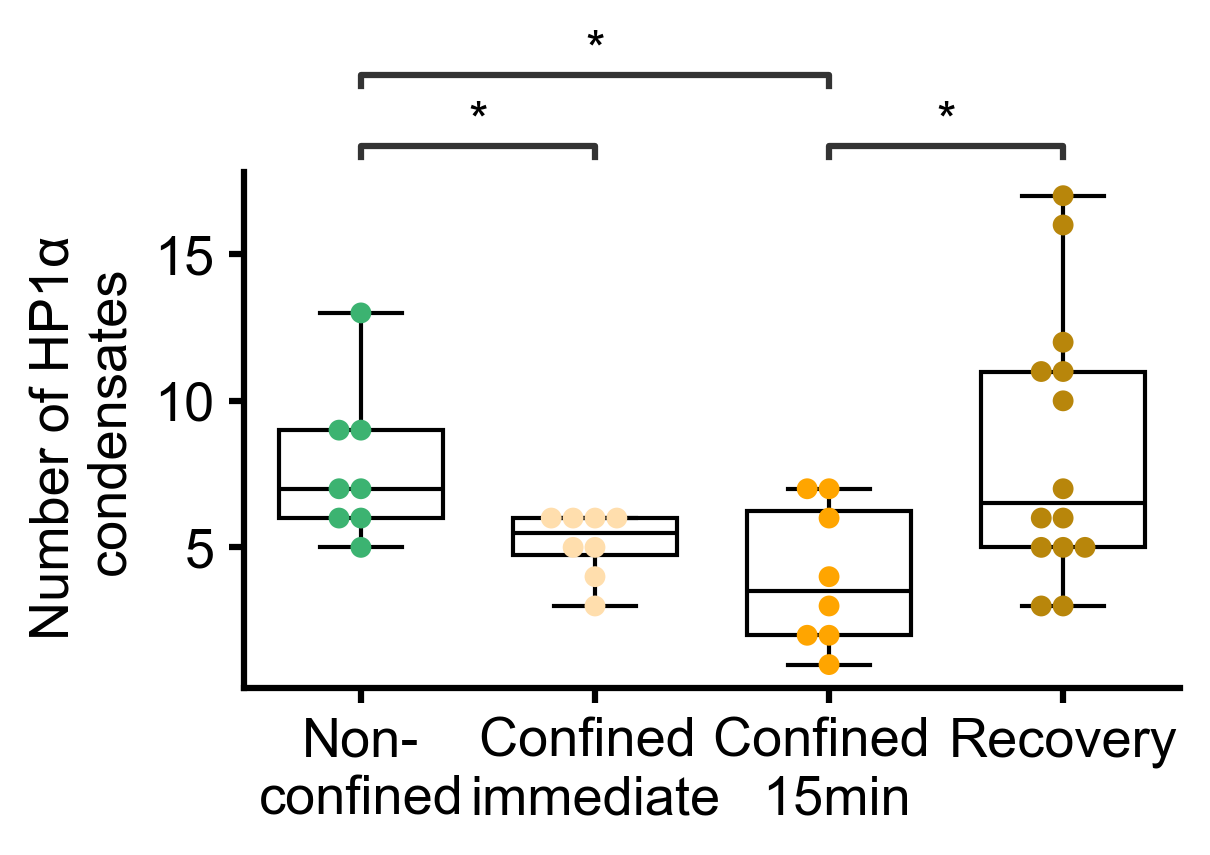

In [7]:
# Specify width and height in millimeters
fig_width_mm = 105  # width of figure - same as A4 page
fig_height_mm = 75  # height of figure

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

# Conditions from df
confiner_labels = ["Non-Confined", "Confined_immediate", "Confined_15m", "Recovery"]
# Define palette for conditions
my_pal = {
    confiner_labels[0]: "mediumseagreen",
    confiner_labels[1]: "navajowhite",
    confiner_labels[2]: "orange",
    confiner_labels[3]: "darkgoldenrod",
}

# Number of total condensates
feature = "Number of total HP1a condensates"
sns.boxplot(
    data=df_total,
    x="Condition",
    order=confiner_labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.7,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    # flierprops=dict(marker='o', markersize=4, markerfacecolor='white', markeredgecolor='white'),
    ax=axes,
)

sns.swarmplot(data=df_total, x="Condition", y=feature, order=confiner_labels, palette=my_pal, ax=axes, size=5)

axes.set(ylabel="Number of HP1α \n condensates")
axes.set(xlabel=None)

# Statistics - # for omitted ns
pairs = [
    (confiner_labels[0], confiner_labels[1]),
    (confiner_labels[0], confiner_labels[2]),
    # (confiner_labels[0], confiner_labels[3]),
    # (confiner_labels[1], confiner_labels[2]),
    # (confiner_labels[1], confiner_labels[3]),
    (confiner_labels[2], confiner_labels[3]),
]

annotator = Annotator(ax=axes, pairs=pairs, data=df_total, x="Condition", y=feature, order=confiner_labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-0.001)
annotator.apply_and_annotate()

lw = 1.5  # thickness

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["left"].set_linewidth(lw)
axes.spines["bottom"].set_linewidth(lw)
axes.tick_params(axis="both", which="major", width=lw)

fontsize = 12

for p in axes.texts:
    p.set_fontsize(fontsize)

new_confiner_labels = ["Non-\nconfined", "Confined \nimmediate", "Confined \n 15min", "Recovery"]

axes.set_xticklabels(new_confiner_labels)

plt.savefig("../../figures/Supplementary/Suppl_Figure5D.pdf", bbox_inches="tight", dpi=300)

plt.show()